# Linear Regression 

## Part 1 - Getting Started 

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Print the dataframe.
2. Prepare your dataset as follows: **[1]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.


In [2]:
# 1. Print the dataframe.
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
# 2. Prepare your dataset as follows: 
import pandas as pd
import numpy as np

# Split the dataset into training and validation sets (80% training, 20% validation). 
# When splitting, set `random_state=1`.
from sklearn.model_selection import train_test_split
feature_data = df.iloc[:,0:40]
target_data = df['Goal']
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=1)

# Standardize the data using StandardScaler from sklearn.
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train=pd.DataFrame(scalar.transform(X_train))
# col_name = feature_data.columns
# X_train.columns = col_name

X_test=pd.DataFrame(scalar.transform(X_test))
# X_test.columns = col_name

# Insert a first column of 1s in both the training and validation data sets.
X_train.insert(loc=0, column='', value=np.ones(X_train.shape[0]))
X_test.insert(loc=0, column='', value=np.ones(X_test.shape[0]))


## Part 2 - Linear Regression - Direct Solution  

Implement the direct solution to linear regression on the training set. 

Report the root-mean-square error (RMSE) for both the training and validation sets. 

In [4]:
# Implement the direct solution to linear regression on the training set. [1]
from sklearn.linear_model import LinearRegression
from scipy.linalg import inv 

W = np.dot(inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
 

In [5]:
# Report the root-mean-square error (RMSE) for both the training and validation sets.[1]
from sklearn.metrics import mean_squared_error

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

RMSE_training = rmse(np.dot(X_train, W), y_train)
RMSE_validation = rmse(np.dot(X_test, W), y_test)

print('RMSE for training : ', RMSE_training)
print('RMSE for validation: ', RMSE_validation)


RMSE for training :  0.0001983241902503662
RMSE for validation:  0.0001874084898605524


## Part 3 - Full Batch Gradient Descent 

We will now implement a full batch gradient descent algorithm and record the training time for our model.

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's validation RMSE converges. Here we will consider it converged once validation RMSE is within 0.1% of the Direct Solution RMSE (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value **Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$)** and will use this value in the next parts too.

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. 

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). 

2. Comment on overfitting/underfitting - is running the algorithm too long a concern here?  

In [6]:
# 1. Implement gradient descent for linear regression, and by iterating until your model's validation RMSE converges.
lr = 10**(-2)
threshold = RMSE_validation * 1.001

# reshape y_train
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# np.random.seed(1090)
w = (np.random.random(W.shape[0])).reshape(1,-1)
w = w/10000

rmse_training=[]
rmse_validation=[]

In [7]:
# Record the training time (from the first iteration until convergence) using the time.time() function.  

import time
start_time = time.time() ## Records current time

for epoch in range (0, 3000): 
    # training
    y_train_pred= np.dot(X_train,w.T)
    train_rmse= rmse(y_train_pred,y_train)
 
    # testing 
    y_test_pred= np.dot(X_test,w.T)
    test_rmse = rmse(y_test_pred,y_test)
    if test_rmse <= threshold:
      break
      
    else:
      rmse_training.append(train_rmse)
      rmse_validation.append(test_rmse)
      gradient = (1/len(y_train_pred) * np.dot(X_train.T, y_train_pred-y_train)).reshape(1,-1)
      w = w - lr * gradient ### weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 0.6552753448486328 (s) ---


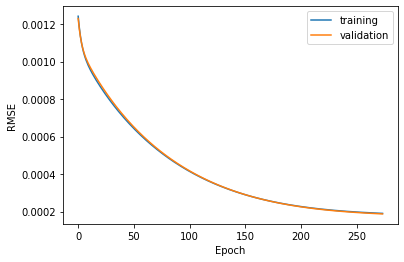

In [8]:
# Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set

import matplotlib.pyplot as plt
import math
 
# np.random.seed(1090)
w = (np.random.random(W.shape[0])).reshape(1,-1)
w = w/10000

rmse_training=[]
rmse_validation=[]

for epoch in range (0, 3000): 

    # training
    y= np.dot(X_train,w.T)
    gradient = (1/len(y) * np.dot(X_train.T, y-y_train)).reshape(1,-1)
    w = w - lr * gradient ### weight update

    # testing 
    y_pred= np.dot(X_test,w.T)
    validation_rmse = rmse(y_pred,y_test)
    rmse_training.append(rmse(np.dot(X_train,w.T),y_train))
    rmse_validation.append(validation_rmse)

    if validation_rmse <= threshold:
      break
 
plt.plot(rmse_training,label='training')
plt.plot(rmse_validation,label='validation')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [9]:
# 2. Comment on overfitting/underfitting - is running the algorithm too long a concern here? 

# Overfitting happens when the model is too complex, would have low training error but high testing error. And underfitting happens when 
# the model is too simple, would have high training error and high testing error. Our model seems fine since both the training and testing 
# errors are very small.

# In general, full bach GD performs well and will converge, but it's computationally expensive, 
# and will take a long time to converge especially when the starting weight is large. To avoid
# this situation happens, decrease the initial weight by using w divided by 10000. 

## Part 4 - Mini-batch and Stochastic Gradient Descent

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. 
The inputs of that function are 
  * Training Data
  * Validation Data
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)
  * Maximum Iterations = 20000

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds the array would look like: [2 4 6 8 ...]).
 * For certain batchsizes GD might not converge to a solution. For that reason we have a parameter "Maximum iterations" where we limit the total number of iterations that this function can perform. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (ie all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batchsizes fit better on the hardware and may achieve higher performance.   
  * Plot training and validation RMSE vs. **epoch** for all the batchsizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE.  
  * Plot training and validation RMSE vs. **time** for all the batchsizes in a figure. The X-axis is Time and the Y-axis is RMSE.  
  * Plot Total training time (y-axis) vs. Batch size (x-axis).  
  * Describe your findings, including the main takeawyas from each of your plots.  

In [10]:
# Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.
 
y_train= pd.DataFrame(y_train)
y_test= pd.DataFrame(y_test)

def mini_batch (X_train, y_train, X_test, y_test, batch_size, lr, CT, max_interation):
 
  rmse_training=[]
  rmse_validation=[]

  # initial weight 
  np.random.seed(1090)
  w = (np.random.random(W.shape[0])).reshape(1,-1)
  w = w/10000
  
  interation = 0

  time_array=[]
  elapsed_time=0

  for epoch in range (0, 300): 
    start_time = time.time()

    a = 0
    b = batch_size * 1

    # mini batch iteration, update the weights through each interaction 
    for iteration in range(math.ceil(X_train.shape[0]/batch_size)-1):
        y= np.dot(X_train[a:b],w.T)
        gradient = (1/len(y) * np.dot(X_train[a:b].T, y-y_train[a:b])).reshape(1,-1)
        w = w - lr * gradient 
        interation = interation + 1
        a = a + batch_size
        b = b + batch_size
        if b > X_train.shape[0]:
          b = X_train.shape[0]   

    # The validation RMSE at each epoch.
    y_val_pred = np.dot(X_test,w.T)
    validation_rmse = rmse(y_val_pred,y_test)
    rmse_validation.append(validation_rmse)
    
    # The training RMSE at each epoch
    y_train_pred = np.dot(X_train,w.T)
    train_rmse = rmse(y_train_pred,y_train)
    rmse_training.append(train_rmse)
    
    elapsed_time = elapsed_time + time.time() - start_time
    time_array.append(elapsed_time)

    if validation_rmse <= threshold:
      # print('converge at', epoch+1, ' epoch')
      break 

    if interation > max_interation:
      print('batch_size=', batch_size,', exceed the total number of iterations')
      break

  return w, rmse_validation, rmse_training, time_array


In [11]:
# Let's now use the function to investigate the effect of batch size on convergence. 
# Sweep different values for the mini-batch size Stochastic GD), Hint: Try batch sizes that are powers of two 

try1 = mini_batch (X_train, y_train, X_test, y_test, 1, lr, threshold, 20000)
try2 = mini_batch (X_train, y_train, X_test, y_test, 16, lr, threshold, 20000)
try3 = mini_batch (X_train, y_train, X_test, y_test, 32, lr, threshold, 20000)
 
# Discover that small batch size < 64 might not converge within maximum number of iterations.  
# Especially for stochastic GD (batch size =1), the result is not reliable since GD not always updates the weight in right directions.

batch_size= 1 , exceed the total number of iterations
batch_size= 16 , exceed the total number of iterations
batch_size= 32 , exceed the total number of iterations


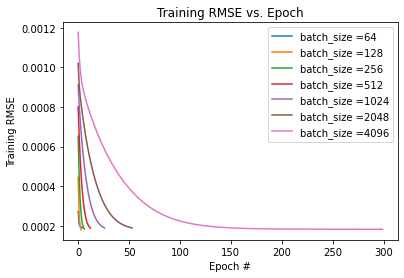

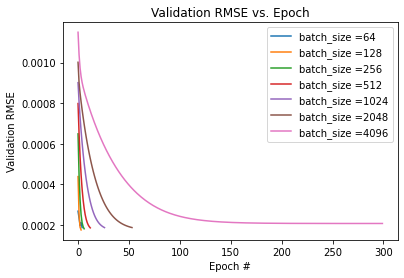

In [12]:
# Plot training and validation RMSE vs. epoch for all the batchsizes in a figure. The X-axis is Epoch and the Y-axis is RMSE.  
batch_size_array = [64,128,256,512,1024,2048,4096]
# np.random.seed(1090)

# Training RMSE vs. Epoch
plt.figure()
for i in batch_size_array:
  output= mini_batch (X_train, y_train, X_test, y_test, i, lr, threshold, 20000)
  rmse_training = output[2]
  plt.plot(rmse_training,label='batch_size =' + str(i))
plt.title('Training RMSE vs. Epoch')
plt.xlabel("Epoch #")
plt.ylabel("Training RMSE")
plt.legend()

# Validation RMSE vs. Epoch
plt.figure()
for i in batch_size_array:
  output= mini_batch (X_train, y_train, X_test, y_test, i, lr, threshold, 20000)
  rmse_validation= output[1]
  plt.plot(rmse_validation,label='batch_size =' + str(i))
plt.title('Validation RMSE vs. Epoch')
plt.xlabel("Epoch #")
plt.ylabel("Validation RMSE")
plt.legend()

plt.show()
 
# Describe findings the last part of this question 

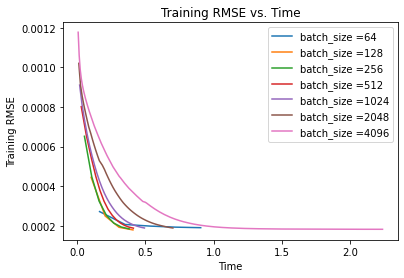

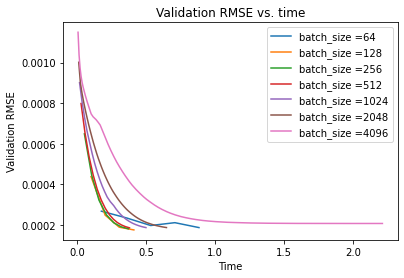

In [13]:
# Plot training and validation RMSE vs. time for all the batchsizes in a figure. The X-axis is Time and the Y-axis is RMSE. 
# np.random.seed(1090)

# Training RMSE vs. Time
plt.figure()
for i in batch_size_array:
  output= mini_batch (X_train, y_train, X_test, y_test, i, lr, threshold, 20000)
  time_array= output[3]
  rmse_training= output[2]
  plt.plot(time_array,rmse_training,label='batch_size ='+ str(i))

plt.title('Training RMSE vs. Time')
plt.xlabel("Time")
plt.ylabel("Training RMSE")
plt.legend()

# Validation RMSE vs. time
plt.figure()
for i in batch_size_array:
  output= mini_batch (X_train, y_train, X_test, y_test, i, lr, threshold, 20000)
  time_array= output[3]
  rmse_validation= output[1]
  plt.plot(time_array,rmse_validation,label='batch_size ='+ str(i))
plt.title('Validation RMSE vs. time')
plt.xlabel("Time")
plt.ylabel("Validation RMSE")
plt.legend()

plt.show()

# Describe findings the last part of this question 


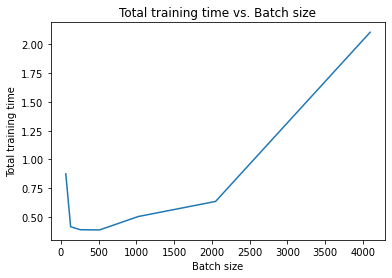

In [14]:
# Plot Total training time (y-axis) vs. Batch size (x-axis).
# np.random.seed(1090)
total_time = []

plt.figure()
for i in batch_size_array:
  output= mini_batch (X_train, y_train, X_test, y_test, i, lr, threshold, 20000)
  total_time.append(output[3][-1])
   
plt.plot(batch_size_array,total_time)
plt.title('Total training time vs. Batch size')
plt.xlabel("Batch size")
plt.ylabel("Total training time")
plt.show()

# Describe findings the last part of this question 

In [15]:
# Describe your findings, including the main takeawyas from each of your plots. 

# For this part, batch sizes <64 might not converge at the end. GD not always update weight in the right dictions when
#     the batch size for training is small. Setting some limit to avoid computational cost. The function would break after 
#     interations reach the iteration limit of 20000.

# From the plot of training and validation RMSE vs. epoch: could see it takes more epoch to converge larger batchsizes.
#      Larger batchsizes performs well but would use too many memory and computational time. 

# From the plot of training and validation RMSE vs. time, could see it takes more time to converge larger or smaller batchsizes.
#      Although smaller batchsized would need fewer number of epoch to converge, it takes more iteration to update weight during
#      each epoch. That could also be shown in the last plot. 

# In order to achieve the computational efficiency, better to choose the batchsizes not too small or too large. 

## Part 5 - Gradient Descent Learning Rate 
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

Select the best batch size based on the fastest convergence time and sweep the learning rate (at least 10 values) while applying Mini-batch GD. 
  1. Plot the training and validation RMSE vs **epoch** (x-axis) for all the learning rates that you tried in a figure. 
  2. Plot the training and validation RMSE vs **time** (x-axis) for all the learning rates that you tried in a figure.  
  3. Describe your findings, including the main takeawyas from each of your plots.  


In [16]:
# Select batchsize = 128 based on the fastest convergence time in part 4, sweep the learning rate while applying Mini-batch GD

# tried lr = 0.00001, 0.0001, 0.03, 1, won't converge 
# try1 = mini_batch (X_train, y_train, X_test, y_test, 128, 0.0001, threshold, 20000)
# try2 = mini_batch (X_train, y_train, X_test, y_test, 128, 0.03, threshold, 20000)
# try3 = mini_batch (X_train, y_train, X_test, y_test, 128, 1, threshold, 20000)
 
# It might take long time to converge when lr < 0.0001 or lr > 0.03, and the interation numbers it take to converge 
# exceed the total number of iterations we set.

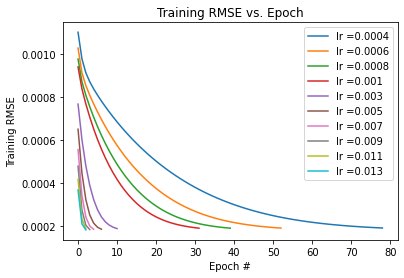

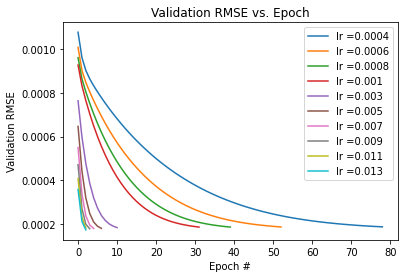

In [17]:
# 1. Plot the training and validation RMSE vs epoch (x-axis) for all the learning rates that you tried in a figure. 
# np.random.seed(1090)

lr_array=[0.0004, 0.0006, 0.0008, 0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.013]

# Training RMSE vs. Epoch
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  rmse_training = output[2]
  plt.plot(rmse_training,label='lr =' + str(l))
plt.title('Training RMSE vs. Epoch')
plt.xlabel("Epoch #")
plt.ylabel("Training RMSE")
plt.legend()

# Validation RMSE vs. Epoch
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  rmse_validation= output[1]
  plt.plot(rmse_validation,label='lr =' + str(l))
plt.title('Validation RMSE vs. Epoch')
plt.xlabel("Epoch #")
plt.ylabel("Validation RMSE")
plt.legend()
plt.show()

# Describe findings the last part of this question 


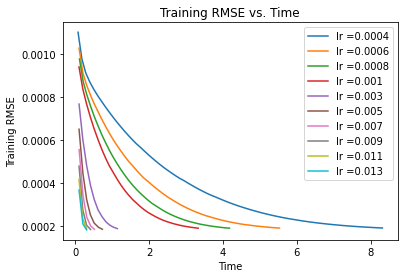

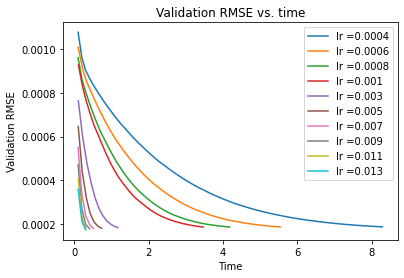

In [18]:
# 2. Plot the training and validation RMSE vs time (x-axis) for all the learning rates that you tried in a figure. 
# np.random.seed(1090)

# Training RMSE vs. Time
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  time_array= output[3]
  rmse_training= output[2]
  plt.plot(time_array,rmse_training,label='lr ='+ str(l))

plt.title('Training RMSE vs. Time')
plt.xlabel("Time")
plt.ylabel("Training RMSE")
plt.legend()

# Validation RMSE vs. time
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  time_array= output[3]
  rmse_validation= output[1]
  plt.plot(time_array,rmse_validation,label='lr ='+ str(l))
plt.title('Validation RMSE vs. time')
plt.xlabel("Time")
plt.ylabel("Validation RMSE")
plt.legend()
plt.show()

# Describe findings the last part of this question 


In [19]:
# 3. Describe your findings, including the main takeawyas from each of your plots. 

# It might take long time to converge when lr < 0.0001 or lr > 0.03, and the interation numbers it take to converge 
# exceed the total number of iterations we set. Since small lr updates weights slowly, large lr flucuate a lot. 

# For good learning rate values (not too small or too large):
# From the plot of training and validation RMSE vs. epoch, could see it takes more epoch to converge smaller lr.
# From the plot of training and validation RMSE vs. time, could see it takes more time to converge smaller lr. 

# In order to achieve the computational efficiency, better to choose the batchsizes around 0.01. 

## Part 6 - Gradient Descent with Adaptive Learning Rate  
Implement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. It's up to you to come up with a way to set **when** and **how much** do you want to change the learning rate. 
Our goal is to find a method for faster convergence. 
  1. Describe **[1]** and implement your method.
  2. Plot the training and validation RMSE vs **epoch** for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate).  
  3. Plot the training and validation RMSE vs **time** for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate).  

In [20]:
# 1. Describe the method.

# Choosing starting lr like 0.02 to avoid divergent cases, too large learning rate like 1 would lead to divergent. 
# Setting the change of learning rate equals to 0.001 (or number smaller than 0.001). 
# In order to find the local minima, using for loop and schema of running time to converge.
# During each interation:
#        1. If the running time with the new (after decrease) lr would converge faster than the old (before decrease) lr,
#        than keep running the iteration and decreasing the lr. 
#        2. Otherwise, break the for loop. 
# Finally, the for loop would output a lr that give the relatively smaller running time. 


# Implement the method.
lr_initial = 0.02
time_initial = mini_batch(X_train, y_train, X_test, y_test, 128, 0.02, threshold, 20000)[3][-1]
time_new = 0

for i in range(1000):
  time_new = mini_batch(X_train, y_train, X_test, y_test, 128, lr_initial - 0.001, threshold, 20000)[3][-1]
  if  time_new < time_initial:
    time_initial= time_new *1 
    lr_initial = lr_initial - 0.002
  else:
    break
print (lr_initial) 
 

0.016


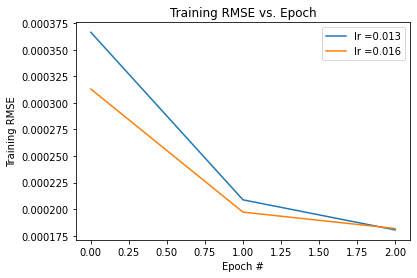

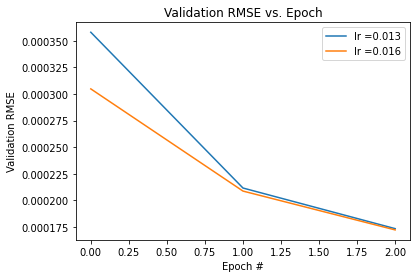

In [21]:
# 2. Plot the training and validation RMSE vs epoch for your method (adaptive learning rate), alongside your best training run from Part 5 

lr_array=[0.013,lr_initial]

# Training RMSE vs. Epoch
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  rmse_training = output[2]
  plt.plot(rmse_training,label='lr =' + str(l))
plt.title('Training RMSE vs. Epoch')
plt.xlabel("Epoch #")
plt.ylabel("Training RMSE")
plt.legend()

# Validation RMSE vs. Epoch
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  rmse_validation= output[1]
  plt.plot(rmse_validation,label='lr =' + str(l))
plt.title('Validation RMSE vs. Epoch')
plt.xlabel("Epoch #")
plt.ylabel("Validation RMSE")
plt.legend()

plt.show()

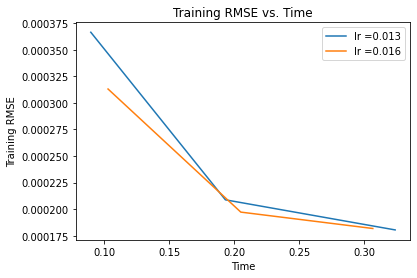

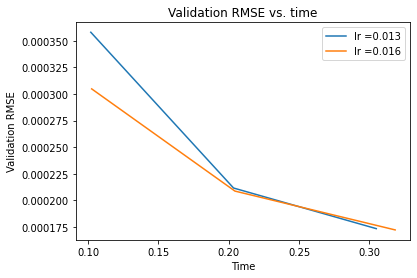

In [22]:
# 3. Plot the training and validation RMSE vs time for your method, alongside your best training run from Part 5  

# Training RMSE vs. Time
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  time_array= output[3]
  rmse_training= output[2]
  plt.plot(time_array,rmse_training,label='lr ='+ str(l))

plt.title('Training RMSE vs. Time')
plt.xlabel("Time")
plt.ylabel("Training RMSE")
plt.legend()

# Validation RMSE vs. time
plt.figure()
for l in lr_array:
  output= mini_batch (X_train, y_train, X_test, y_test, 128, l, threshold, 20000)
  time_array= output[3]
  rmse_validation= output[1]
  plt.plot(time_array,rmse_validation,label='lr ='+ str(l))
plt.title('Validation RMSE vs. time')
plt.xlabel("Time")
plt.ylabel("Validation RMSE")
plt.legend()

plt.show()

# from the 'Validation RMSE vs. time' plot, adaptive lr use less time than static one. 

## Part 7 - Gradient Descent with Additional Features and Regularization  

Now, we'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation  
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y). 
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.

2. Linear Regression  
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features  
  * Let's add more features to our dataset (up to degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization  
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

5. Discuss your results. What do you conclude?  

In [23]:
import pandas as pd
df=pd.read_csv("https://www.eecg.utoronto.ca/~hadizade/APS1070/LR_data.csv" , skipinitialspace=True)

In [24]:
# 1. Data Preparation 

# Print the dataset 
print(df)

# create Numpy arrays with inputs (X) and outputs (y).
X = np.array(df.iloc[:,0:10])
y = df['y']
 
# Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set random_state=1.
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1)


           x1        x2        x3  ...        x9       x10             y
0    1.454481  4.940543  7.116015  ...  3.841250  6.121133  6.575066e+06
1    4.907182  1.653654  7.339445  ...  8.646473  3.806860  8.419881e+06
2    1.842804  1.183878  4.203206  ...  3.260723  5.463808  9.745537e+04
3    2.393457  0.094127  3.208929  ...  7.312995  5.475240  1.129200e+04
4    5.093724  3.905293  4.858562  ...  9.128607  0.790795  3.105448e+05
..        ...       ...       ...  ...       ...       ...           ...
195  2.936450  2.094812  9.493814  ...  7.622569  3.037162  6.599726e+07
196  4.915597  1.953974  7.312552  ...  7.043560  5.745565  8.176250e+06
197  6.772096  6.406489  4.638352  ...  9.386478  4.147710  2.144147e+05
198  3.940339  4.330498  6.693371  ...  7.883720  8.525164  4.028735e+06
199  8.636129  1.272939  4.339175  ...  9.543772  5.673870  1.257168e+05

[200 rows x 11 columns]


In [25]:
# 2. Linear Regression  

# Standardize the data using StandardScaler from sklearn
scalar = StandardScaler().fit(X_train)
X_train2=pd.DataFrame(scalar.transform(X_train))
X_test2=pd.DataFrame(scalar.transform(X_test))
 
# No need to insert a first column of 1s, done by LinearRegression
# Use the sklearn.linear_model.LinearRegression function here to perform linear regression.
reg = LinearRegression().fit(X_train2, y_train)

# Print the RMSE for training and validation data.
y_train_pred= reg.predict(X_train2)
y_test_pred= reg.predict(X_test2)

RMSE_training = rmse(y_train_pred, y_train)
RMSE_validation =  rmse(y_test_pred, y_test)

print('RMSE for training : ', RMSE_training)
print('RMSE for validation: ', RMSE_validation)

RMSE for training :  16296980.655667372
RMSE for validation:  14061578.864980105


In [26]:
# 3. Linear Regression with Additional Features  

# Let's add more features to our dataset (up to degree 8) using sklearn.preprocessing.PolynomialFeatures. 
# You'll want to create the additional features first, then perform standardization (start from non-standardized data).
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8)

X_train3= poly.fit_transform(X_train)
X_test3= poly.transform(X_test)

# Standardize the data using StandardScaler from sklearn
scalar = StandardScaler().fit(X_train3)
X_train3= pd.DataFrame(scalar.transform(X_train3))
X_test3= pd.DataFrame(scalar.transform(X_test3))
# X_test3= pd.DataFrame(X_test3)

# Insert a first column of 1s in both the training and validation data sets.
X_train3.insert(loc=0, column='', value=np.ones(X_train3.shape[0]))
X_test3.insert(loc=0, column='', value=np.ones(X_test3.shape[0]))

# Again, use sklearn.linear_model.LinearRegression to perform linear regression.
reg = LinearRegression().fit(X_train3, y_train)

# Print the RMSE for training and validation data.
y_train_pred= reg.predict(X_train3)
y_test_pred= reg.predict(X_test3)

RMSE_training = rmse(y_train_pred, y_train)
RMSE_validation =  rmse(y_test_pred, y_test)

print('RMSE for training : ', RMSE_training)
print('RMSE for validation: ', RMSE_validation)


RMSE for training :  1.1677265447323795e-07
RMSE for validation:  10920642.2173942


In [27]:
# 4.Linear Regression with Additional Features and Regularization  

# use the sklearn.linear_model.Ridge function here to perform linear regression with regularization. 
# Apply the model to the processed data (additional, standardized) you used in 3 above. 
from sklearn.linear_model import Ridge

# Use a FOR loop to run sklearn.linear_model.Ridge with different alpha values. Specifically, sweep alpha from 1E-2 to 1E10 
# (each step is an order of magnitude jump).

# Insert a first column of 1s in both the training and validation data sets.
# X_train3.insert(loc=0, column='', value=np.ones(X_train3.shape[0]))
# X_test3.insert(loc=0, column='', value=np.ones(X_test3.shape[0]))


alpha_array= [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10]
 
RMSE_training= []
RMSE_validation= []

for i in alpha_array:
  clf = Ridge(alpha=i)
  clf.fit(X_train3, y_train)
  y_train_pred=clf.predict(X_train3)
  y_test_pred= clf.predict(X_test3)
  
  RMSE_training.append(rmse(y_train_pred, y_train)) 
  RMSE_validation.append(rmse(y_test_pred, y_test)) 


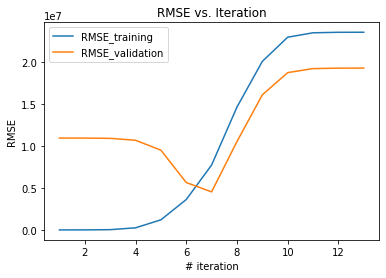

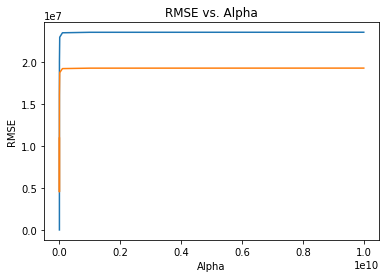

In [28]:
# 5.Discuss your results. What do you conclude? 

# RMSE vs. Iteration
plt.figure()
iteration= np.arange(1,14,1) 
plt.plot(iteration, RMSE_training,label='RMSE_training')
plt.plot(iteration, RMSE_validation,label='RMSE_validation')

plt.title('RMSE vs. Iteration')
plt.xlabel("# iteration")
plt.ylabel("RMSE")
plt.legend()
 
# RMSE vs. Alpha
plt.figure()
plt.plot(alpha_array,RMSE_training,label='lr =')
plt.plot(alpha_array,RMSE_validation,label='lr =')

plt.title('RMSE vs. Alpha')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

# lowest validation error, when regularization strength = 10000

# The training error increasing while increase the regularization strength.
# The validation error is large when regularization strength too small or too large, best performance when regularization strength = 10000.

In [29]:
pd.DataFrame(np.array([['Linear regression', 16296980.65,         14061578.86], 
                             ['Additional Features', 1.17e-07,          10920642.22], 
                             ['Regularization (alpha = 10000)', 4521905.58, 7712389.43]]),
                   columns=['', 'RMSE_training', 'RMSE_validation'])


# 1. Linear regression has largest training and validation error due to underfitting.
# 2. Linear regression with additional features has almost zero training error but high validation error due to overfitting
#   (add too much features).
# 3. Linear regression with additional features and regularization 
#          (choose the best case with lowest validation error, when regularization strength = 10000 )
#           regularization prevent the overfitting, penalty lower the vilidation error.
# Among all 3 method, the third approach gives the best performance.

,,RMSE_training,RMSE_validation
0,Linear regression,16296980.65,14061578.86
1,Additional Features,1.17e-07,10920642.22
2,Regularization (alpha = 10000),4521905.58,7712389.43


## Part 8 - Linear Regression with a Custom Dataset 


Find a dataset online and train and validate a linear regression model with the techniques you learned in this Project.

*   Introduce your dataset. 
*   Explain your approach.  
*   Summarize your results.  

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.






In [30]:
from sklearn.datasets import load_boston
boston= load_boston() 

# Introduce your dataset.
features_intro = pd.DataFrame(np.array([['CRIM', 'per capita crime rate by town'], 
                       ['ZN ', 'proportion of residential land zoned for lots over 25,000 sq.ft'], 
                       ['INDUS', 'proportion of non-retail business acres per town'],
                       ['CHAS','Charles River dummy variable (= 1 if tract bounds river; 0 otherwise'],
                       ['NOX','nitric oxides concentration (parts per 10 million)'],
                       ['RM','average number of rooms per dwelling'],
                       ['AGE', 'proportion of owner-occupied units built prior to 1940'],
                       ['DIS','weighted distances to five Boston employment centres'],
                       ['RAD', 'index of accessibility to radial highways'],
                       ['TAX','full-value property-tax rate per $10,000'],
                       ['PTRATIO','pupil-teacher ratio by town'],
                       ['B','1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town'],
                       ['LSTAT','% lower status of the population']
                       ]),
                   columns=['Feature', 'Information'])

print(features_intro)
print ('')

boston_X = pd.DataFrame(boston.data)
boston_X.columns = list(boston.feature_names)
print ("dataset features: ", boston_X.shape[1])
print ("dataset observations: ", boston_X.shape[0])
print ('')

boston_y = pd.DataFrame(boston.target)
boston_y.columns= ['house_prices']
boston = boston_X.append(boston_y)

pd.concat([boston_X, boston_y], axis=1)

    Feature                                        Information
0      CRIM                      per capita crime rate by town
1       ZN   proportion of residential land zoned for lots ...
2     INDUS   proportion of non-retail business acres per town
3      CHAS  Charles River dummy variable (= 1 if tract bou...
4       NOX  nitric oxides concentration (parts per 10 mill...
5        RM               average number of rooms per dwelling
6       AGE  proportion of owner-occupied units built prior...
7       DIS  weighted distances to five Boston employment c...
8       RAD          index of accessibility to radial highways
9       TAX           full-value property-tax rate per $10,000
10  PTRATIO                        pupil-teacher ratio by town
11        B  1000(Bk - 0.63)^2 where Bk is the proportion o...
12    LSTAT                   % lower status of the population

dataset features:  13
dataset observations:  506



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
# Explain your approach. 

# Use three regression method, find one gives the smallest validation error
# 1. Linear regression
# 2. Linear regression with additional features 
# 3. Linear regression with additional features and regularization  

# Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set random_state=1.
X_train, X_test, y_train, y_test = train_test_split(boston_X , boston_y, test_size=0.2, random_state=1)
 

In [32]:
# 1. Linear regression

# Standardize the data using StandardScaler from sklearn
scalar = StandardScaler().fit(X_train)
X_train2=pd.DataFrame(scalar.transform(X_train))
X_test2=pd.DataFrame(scalar.transform(X_test))

# Use the sklearn.linear_model.LinearRegression function here to perform linear regression.
reg = LinearRegression().fit(X_train2, y_train)

# Print the RMSE for training and validation data.
y_train_pred= reg.predict(X_train2)
y_test_pred= reg.predict(X_test2)

RMSE_training = rmse(y_train_pred, y_train)
RMSE_validation =  rmse(y_test_pred, y_test)

print('RMSE for training : ', RMSE_training)
print('RMSE for validation: ', RMSE_validation)

RMSE for training :  4.675766751547773
RMSE for validation:  4.835373458200537


In [33]:
# 2. Linear regression with additional features 

poly = PolynomialFeatures(degree=3)
X_train3= poly.fit_transform(X_train)
X_test3= poly.transform(X_test)

# Standardize the data using StandardScaler from sklearn
scalar = StandardScaler().fit(X_train3)
X_train3= pd.DataFrame(scalar.transform(X_train3))
X_test3= pd.DataFrame(scalar.transform(X_test3))
# X_test3= pd.DataFrame(X_test3)

# Insert a first column of 1s in both the training and validation data sets.
X_train3.insert(loc=0, column='', value=np.ones(X_train3.shape[0]))
X_test3.insert(loc=0, column='', value=np.ones(X_test3.shape[0]))

# Again, use sklearn.linear_model.LinearRegression to perform linear regression.
reg = LinearRegression().fit(X_train3, y_train)

# Print the RMSE for training and validation data.
y_train_pred= reg.predict(X_train3)
y_test_pred= reg.predict(X_test3)

RMSE_training = rmse(y_train_pred, y_train)
RMSE_validation =  rmse(y_test_pred, y_test)

print('RMSE for training : ', RMSE_training)
print('RMSE for validation: ', RMSE_validation)


RMSE for training :  1.3166157141417224e-11
RMSE for validation:  39.92167278341052


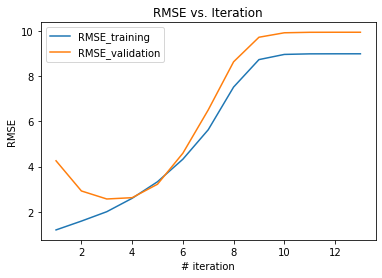

In [34]:
# 3. Linear regression with additional features and regularization  

alpha_array= [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10]
 
RMSE_training= []
RMSE_validation= []

for i in alpha_array:
  clf = Ridge(alpha=i)
  clf.fit(X_train3, y_train)
  y_train_pred=clf.predict(X_train3)
  y_test_pred= clf.predict(X_test3)
  
  RMSE_training.append(rmse(y_train_pred, y_train)) 
  RMSE_validation.append(rmse(y_test_pred, y_test)) 

# RMSE vs. Iteration
plt.figure()
iteration= np.arange(1,14,1) 
plt.plot(iteration, RMSE_training,label='RMSE_training')
plt.plot(iteration, RMSE_validation,label='RMSE_validation')

plt.title('RMSE vs. Iteration')
plt.xlabel("# iteration")
plt.ylabel("RMSE")
plt.legend()

# lowest validation error, when regularization strength = 1 

In [35]:
# Summarize your results. 

pd.DataFrame(np.array([['Linear regression', 4.6757,         4.8353], 
                             ['Additional Features', 1.3166e-11,          39.9217], 
                             ['Regularization (alpha=1)', 2.0016, 2.5642]]),
                   columns=['', 'RMSE_training', 'RMSE_validation'])

# The linear regression with additional features and regularization gives the best performance (lowest validation error).

,,RMSE_training,RMSE_validation
0,Linear regression,4.6757,4.8353
1,Additional Features,1.3166e-11,39.9217
2,Regularization (alpha=1),2.0016,2.5642
